In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
df = pd.read_csv('netflix userbase.csv')
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


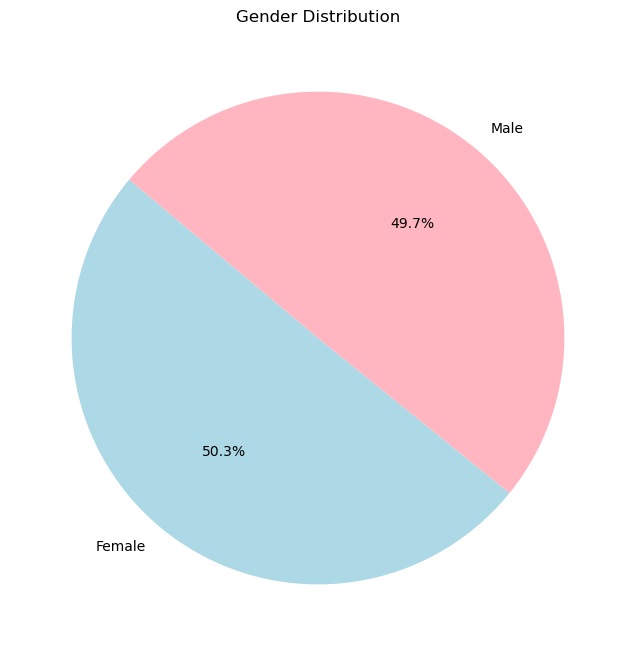

In [12]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', colors=['lightblue','lightpink'], startangle=140)
plt.title('Gender Distribution')

plt.show()

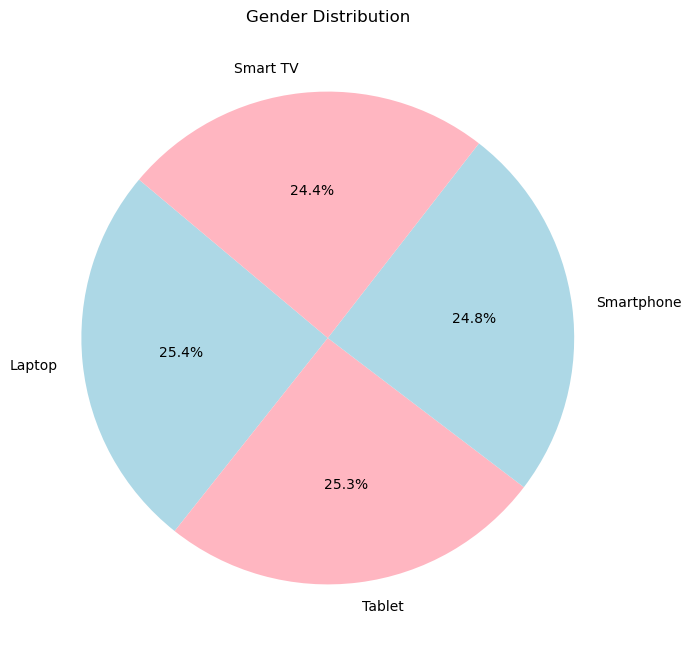

In [14]:
gender_counts = df['Device'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', colors=['lightblue','lightpink'], startangle=140)
plt.title('Gender Distribution')

plt.show()

In [16]:
average_ages = df.groupby('Subscription Type')['Age'].mean()
print(average_ages)

Subscription Type
Basic       38.828829
Premium     38.512960
Standard    39.022135
Name: Age, dtype: float64


In [18]:
Number_of_Customers = df.groupby('Subscription Type')['User ID'].count()
Number_of_Customers_df = Number_of_Customers.reset_index()
print(Number_of_Customers_df)

  Subscription Type  User ID
0             Basic      999
1           Premium      733
2          Standard      768


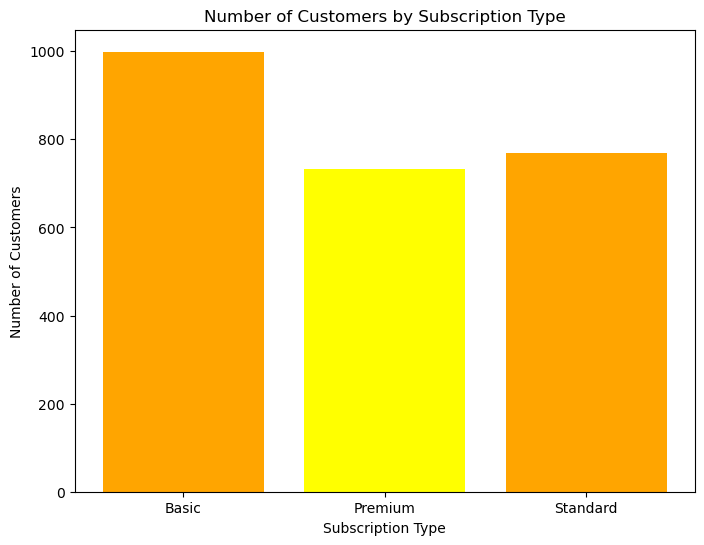

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(Number_of_Customers_df['Subscription Type'], Number_of_Customers_df['User ID'], color=['orange', 'yellow'])
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Subscription Type')
plt.show()

In [46]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%Y-%m-%d')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%Y-%m-%d')
df['Number of Days'] = (df['Last Payment Date'] - df['Join Date']).dt.days
print(df['Number of Days'])

0       629
1       774
2       119
3       262
4       174
       ... 
2495    500
2496    462
2497    310
2498    364
2499    481
Name: Number of Days, Length: 2500, dtype: int64


In [54]:
average_stays_per_plan = df.groupby('Subscription Type')['Number of Days'].mean().reset_index()
print(average_stays_per_plan)

  Subscription Type  Number of Days
0             Basic      326.428428
1           Premium      323.291951
2          Standard      328.359375


In [56]:
x = df['Monthly Revenue']
y = df['Number of Days']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Number of Days   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05333
Date:                Sat, 07 Sep 2024   Prob (F-statistic):              0.817
Time:                        15:58:27   Log-Likelihood:                -15487.
No. Observations:                2500   AIC:                         3.098e+04
Df Residuals:                    2498   BIC:                         3.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             330.1666     17.761     

The model does not explain the variability in Number of Days based on Monthly Revenue (R-squared is 0.000).
The relationship between Monthly Revenue and Number of Days is not statistically significant (p-value for Monthly Revenue is 0.817).
The intercept is significant, but it doesn’t provide meaningful insight into the relationship between the variables.